In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
from riskyneuroarousal.utils.load_data import (load_behavioral_data, load_pupil_data)
%load_ext rpy2.ipython

In [2]:
behavior = load_behavioral_data(min_RT = 0.2)
pupil_data = load_pupil_data()
data = pupil_data.merge(behavior, on=["sub", "trial"])
data["pupil_size"] = data["ps_preprocessed"] - data["baseline"]

In [3]:
data.groupby("condition")["RT"].mean(), data.groupby("condition")["RT"].std()

(condition
 equalIndifference    1.683021
 equalRange           1.555090
 Name: RT, dtype: float64,
 condition
 equalIndifference    0.613864
 equalRange           0.569354
 Name: RT, dtype: float64)

Visualize the mean pupil dilation time course across condition. 

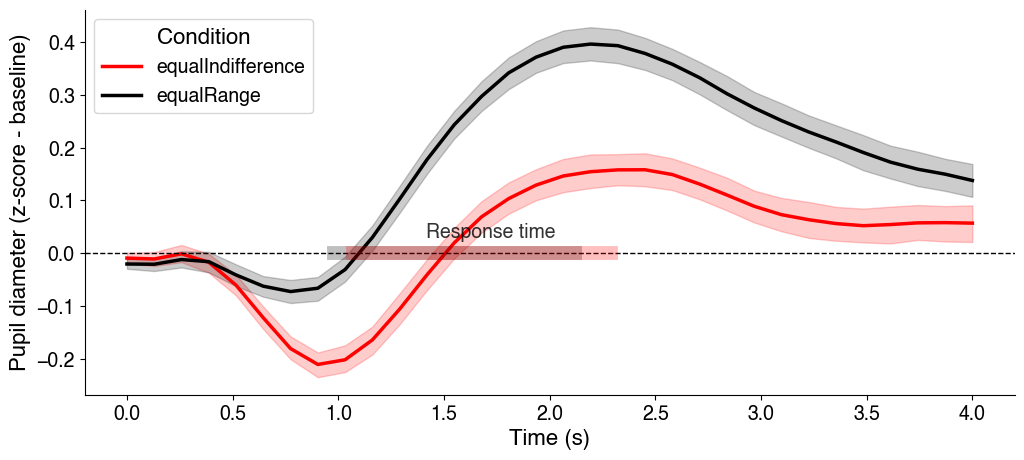

In [6]:
# Create figure
custom_palette = {"equalIndifference": "red", "equalRange": "black"}
fig, ax = plt.subplots(figsize=(12, 5))
# Set the font type
plt.rcParams["font.family"] = "Helvetica"

# Create the line plot with the custom colors
sns.lineplot(data=data, 
             x="timebin", 
             y="pupil_size", 
             hue="condition", 
             palette=custom_palette, 
             linewidth = 2.5)
# Add dashed horizontal line at 0
plt.axhline(0, color="black", linestyle="--", linewidth=1)
# Remove top and right spines
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
# Set x and y axis labels
plt.xlabel("Time (s)", fontsize=16)
plt.ylabel("Pupil diameter (z-score - baseline)", fontsize=16)
# Set legend
plt.legend(title="Condition", fontsize=14, title_fontsize=16)
# Make ticks larger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Create a thick horizontal line, alpha = 0.5 with black color centered at 1.55 w std = 0.57
plt.plot([1.55 - 0.57, 1.55 + 0.57], [0, 0], color="black", alpha=0.25, linewidth=10)
# Create a thick horizontal line, alpha = 0.5 with red color centered at 1.68 w std = 0.61
plt.plot([1.68 - 0.61, 1.68 + 0.61], [0, 0], color="red", alpha=0.25, linewidth=10)
# Add text to the plot
plt.text(1.72, 0.03, "Response time", fontsize=14, color="black", ha="center", alpha = 0.8)
plt.show()

Visualize the baseline

In [44]:
baseline_mean = data.groupby(["sub", "condition"])["baseline"].mean().reset_index()

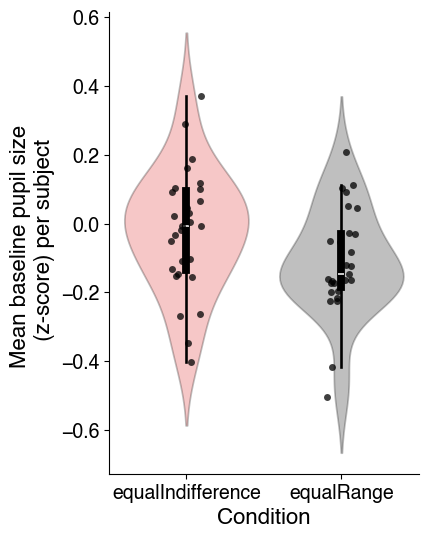

In [54]:
fig, ax = plt.subplots(figsize=(4, 6))
sns.violinplot(data=baseline_mean, x="condition", y="baseline", hue = "condition",  palette=custom_palette, alpha = 0.25)
sns.stripplot(data=baseline_mean, x="condition", y="baseline", color="black", alpha=0.75)
plt.xlabel("Condition", fontsize=16)
plt.ylabel("Mean baseline pupil size \n (z-score) per subject", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Remove top and right spines
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.show()